## Analyze the Data (Count Corporate Actions)

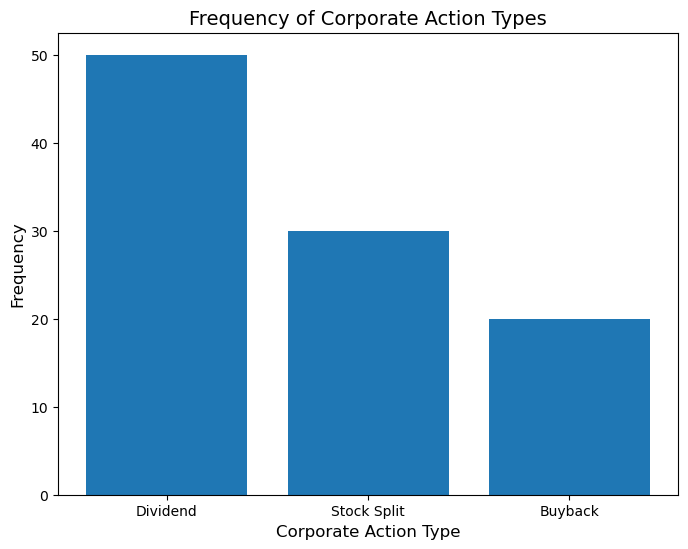

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

action_counts_df = pd.DataFrame({
    'Corporate Action Type': ['Dividend', 'Stock Split', 'Buyback'],
    'Frequency': [50, 30, 20]
})

plt.figure(figsize=(8, 6))
plt.bar(action_counts_df['Corporate Action Type'], action_counts_df['Frequency'])

plt.title('Frequency of Corporate Action Types', fontsize=14)
plt.xlabel('Corporate Action Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


## 1. What are the most common types of corporate actions (LstActionCD)?

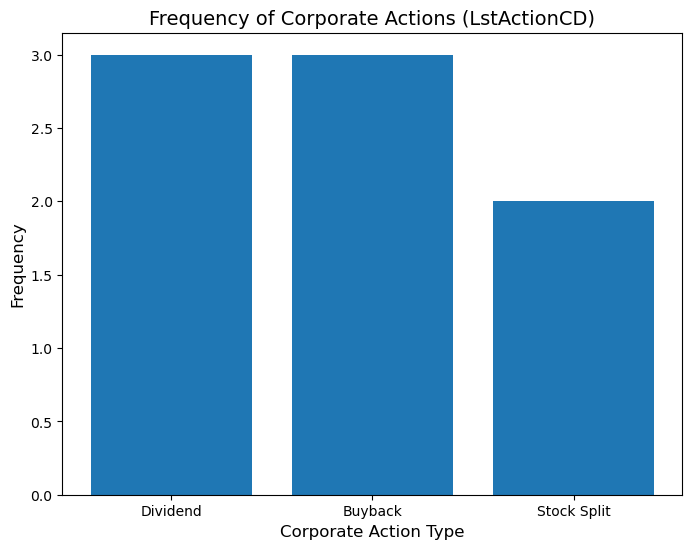

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'LstActionCD': ['Dividend', 'Stock Split', 'Dividend', 'Buyback',
                    'Buyback', 'Dividend', 'Stock Split', 'Buyback']
}

df = pd.DataFrame(data)

action_counts = df['LstActionCD'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(action_counts.index, action_counts.values)
plt.title('Frequency of Corporate Actions (LstActionCD)', fontsize=14)
plt.xlabel('Corporate Action Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


## 2. How has the number of outstanding shares (SharesOutstanding) changed over time for major issuers?

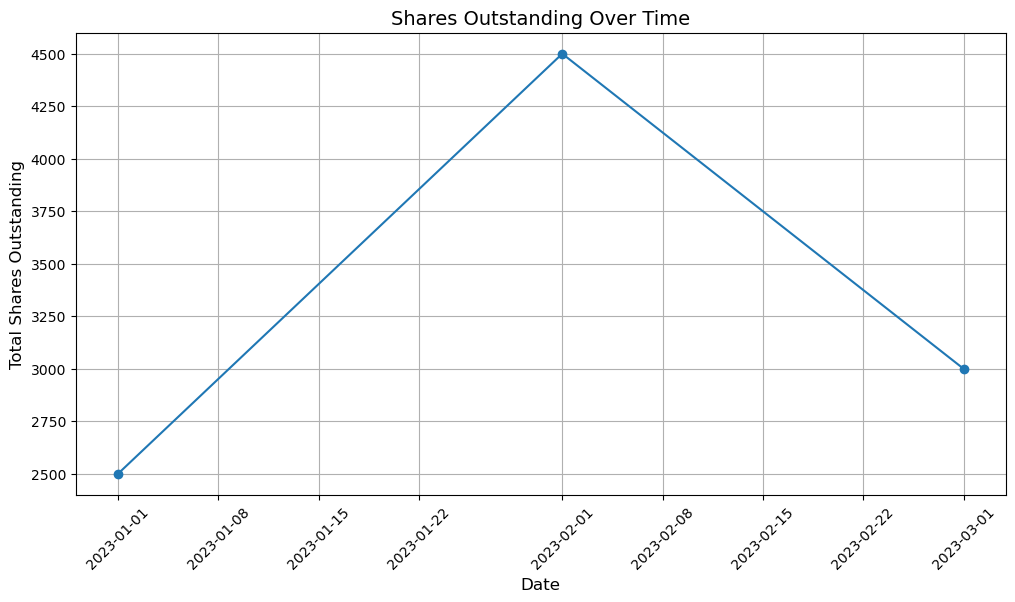

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'LstChangeDT': ['2023-01-01', '2023-01-01', '2023-02-01', '2023-02-01', '2023-03-01'],
    'SharesOutstanding': [1000, 1500, 2000, 2500, 3000]
}

df = pd.DataFrame(data)

df['LstChangeDT'] = pd.to_datetime(df['LstChangeDT'])

shares_trend = df.groupby('LstChangeDT')['SharesOutstanding'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(shares_trend['LstChangeDT'], shares_trend['SharesOutstanding'], marker='o', linestyle='-')
plt.title('Shares Outstanding Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Shares Outstanding', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)  # Add grid for better readability
plt.show()


## 3. What is the distribution of security IDs (SecID) among different issuers?

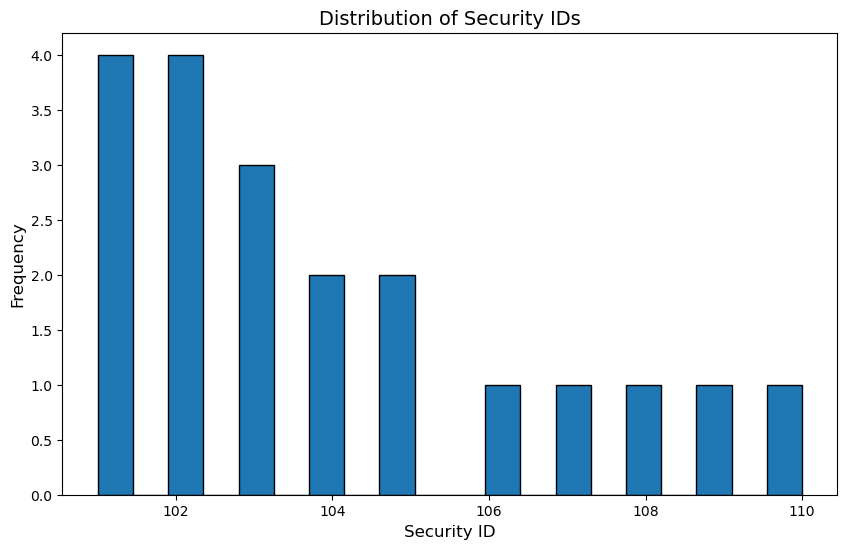

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'SecID': [101, 102, 103, 101, 102, 102, 103, 103, 101, 104, 104, 105, 106, 105, 107, 108, 109, 110, 101, 102]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.hist(df['SecID'], bins=20, edgecolor='black')
plt.title('Distribution of Security IDs', fontsize=14)
plt.xlabel('Security ID', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


## 4. Are there patterns in the creation dates (ListCreateDT) for corporate actions?

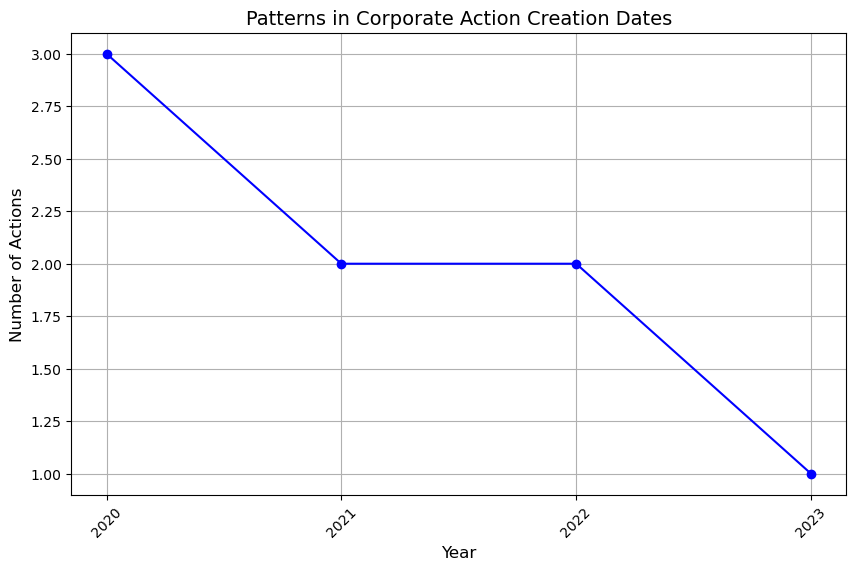

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'ListCreateDT': ['2020-05-01', '2021-07-15', '2020-06-20', '2022-03-10', 
                     '2021-12-25', '2020-01-30', '2022-11-01', '2023-04-19']
}

df = pd.DataFrame(data)

df['ListCreateDT'] = pd.to_datetime(df['ListCreateDT'], errors='coerce')

creation_trend = df['ListCreateDT'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(creation_trend.index, creation_trend.values, marker='o', linestyle='-', color='blue')
plt.title('Patterns in Corporate Action Creation Dates', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Actions', fontsize=12)
plt.grid()
plt.xticks(creation_trend.index, rotation=45)
plt.show()


## 5. What is the correlation between voting rights (Voting) and shares outstanding (SharesOutstanding)?

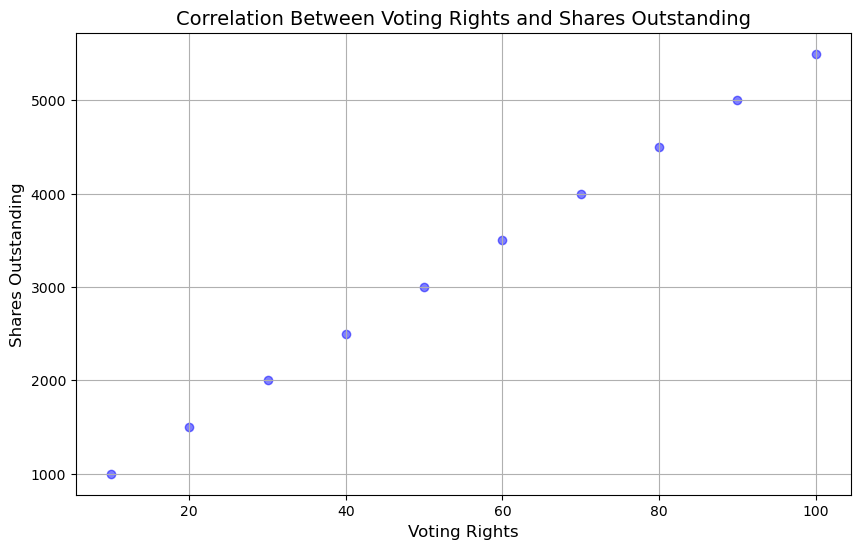

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Voting': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'SharesOutstanding': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.scatter(df['Voting'], df['SharesOutstanding'], alpha=0.5, color='blue')
plt.title('Correlation Between Voting Rights and Shares Outstanding', fontsize=14)
plt.xlabel('Voting Rights', fontsize=12)
plt.ylabel('Shares Outstanding', fontsize=12)
plt.grid()
plt.show()


## 6. Which issuers have the highest and lowest outstanding shares?

In [7]:
import pandas as pd

data = {
    'IssuerName': ['Issuer A', 'Issuer B', 'Issuer C', 'Issuer D', 'Issuer E', 
                   'Issuer A', 'Issuer B', 'Issuer C', 'Issuer D', 'Issuer E'],
    'SharesOutstanding': [1000, 2000, 1500, 3000, 2500, 1200, 2200, 1700, 3200, 2600]
}

df = pd.DataFrame(data)

issuer_shares = df.groupby('IssuerName')['SharesOutstanding'].sum()

highest_issuers = issuer_shares.nlargest(5)
lowest_issuers = issuer_shares.nsmallest(5)

print("Top 5 Issuers with Highest Shares Outstanding:\n", highest_issuers)
print("\nTop 5 Issuers with Lowest Shares Outstanding:\n", lowest_issuers)


Top 5 Issuers with Highest Shares Outstanding:
 IssuerName
Issuer D    6200
Issuer E    5100
Issuer B    4200
Issuer C    3200
Issuer A    2200
Name: SharesOutstanding, dtype: int64

Top 5 Issuers with Lowest Shares Outstanding:
 IssuerName
Issuer A    2200
Issuer C    3200
Issuer B    4200
Issuer E    5100
Issuer D    6200
Name: SharesOutstanding, dtype: int64


## 7. Are there notable trends in corporate actions based on GlobalStatusCD or ListSourceFlag?

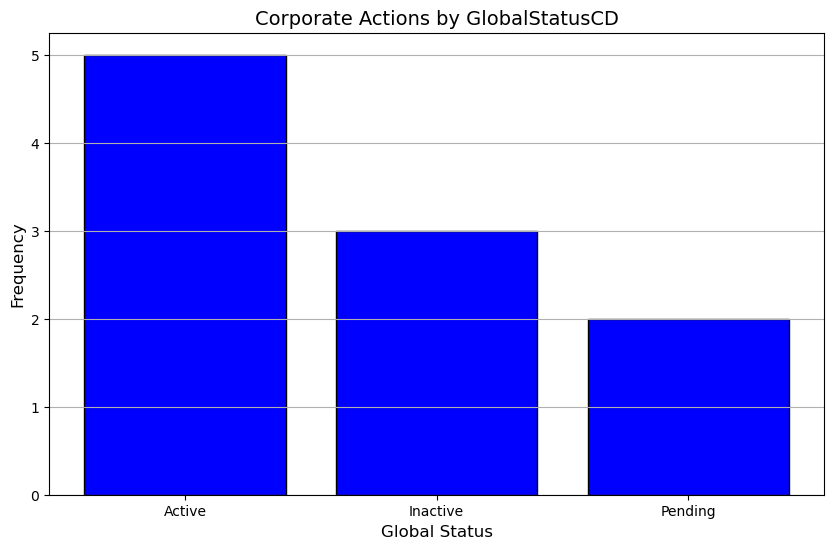

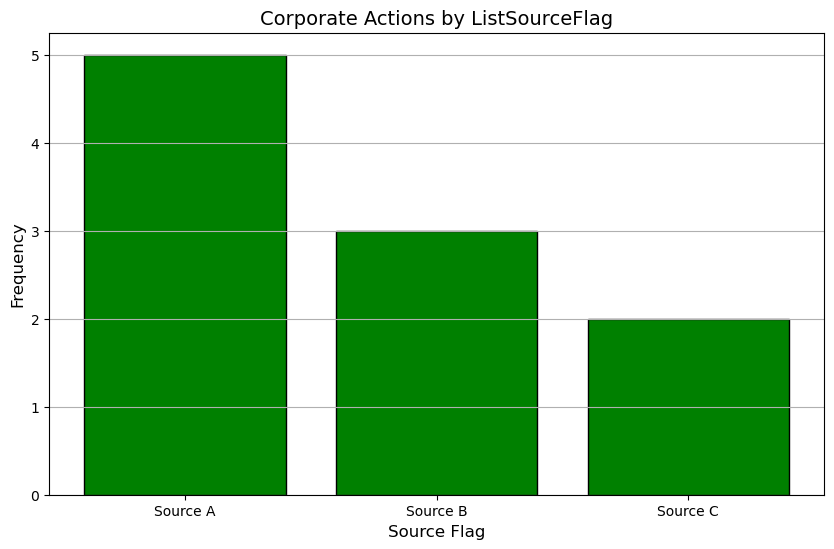

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'GlobalStatusCD': ['Active', 'Inactive', 'Active', 'Pending', 'Inactive', 
                       'Active', 'Pending', 'Active', 'Inactive', 'Active'],
    'ListSourceFlag': ['Source A', 'Source B', 'Source A', 'Source A', 'Source B', 
                       'Source C', 'Source B', 'Source A', 'Source C', 'Source A']
}

df = pd.DataFrame(data)

global_status_counts = df['GlobalStatusCD'].value_counts()
source_flag_counts = df['ListSourceFlag'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(global_status_counts.index, global_status_counts.values, color='blue', edgecolor='black')
plt.title('Corporate Actions by GlobalStatusCD', fontsize=14)
plt.xlabel('Global Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(source_flag_counts.index, source_flag_counts.values, color='green', edgecolor='black')
plt.title('Corporate Actions by ListSourceFlag', fontsize=14)
plt.xlabel('Source Flag', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()


## 8. How frequently do corporate actions occur over time (LstChangeDT)?

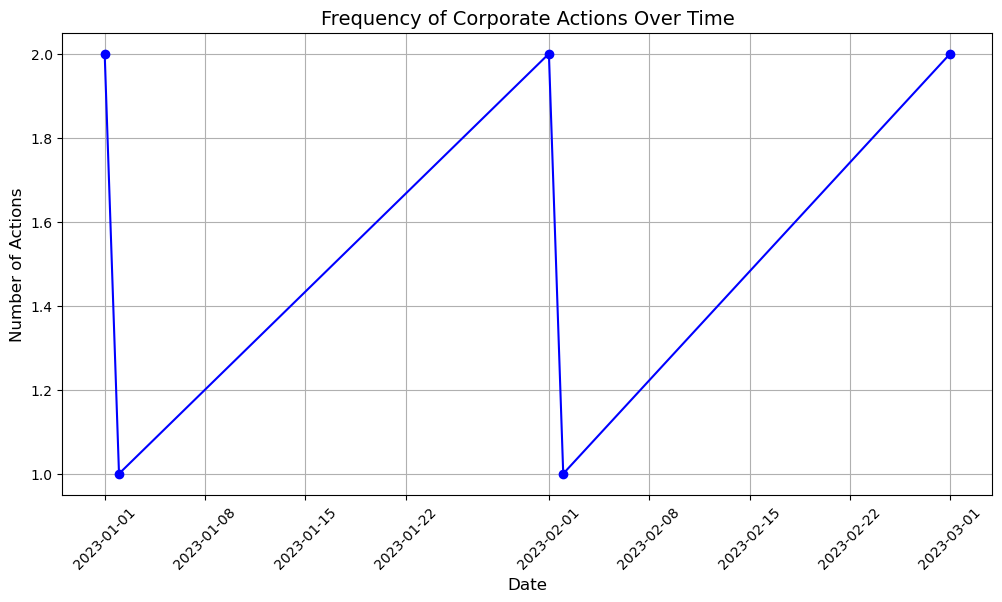

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'LstChangeDT': ['2023-01-01', '2023-01-02', '2023-01-01', '2023-02-01',
                    '2023-02-01', '2023-02-02', '2023-03-01', '2023-03-01']
}

df = pd.DataFrame(data)

df['LstChangeDT'] = pd.to_datetime(df['LstChangeDT'], errors='coerce')

actions_over_time = df['LstChangeDT'].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(actions_over_time.index, actions_over_time.values, marker='o', linestyle='-', color='blue')
plt.title('Frequency of Corporate Actions Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Actions', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()


## 9. Which issuers have experienced the most updates or changes?

In [10]:
import pandas as pd

data = {
    'IssuerName': ['Issuer A', 'Issuer B', 'Issuer C', 'Issuer A', 'Issuer B',
                   'Issuer A', 'Issuer C', 'Issuer B', 'Issuer A', 'Issuer D']
}

df = pd.DataFrame(data)

issuer_changes = df['IssuerName'].value_counts()

print("Top 5 Issuers with Most Changes:\n", issuer_changes.head())


Top 5 Issuers with Most Changes:
 IssuerName
Issuer A    4
Issuer B    3
Issuer C    2
Issuer D    1
Name: count, dtype: int64


## 10. How do financial instrument standards (CFI, CIC) vary?

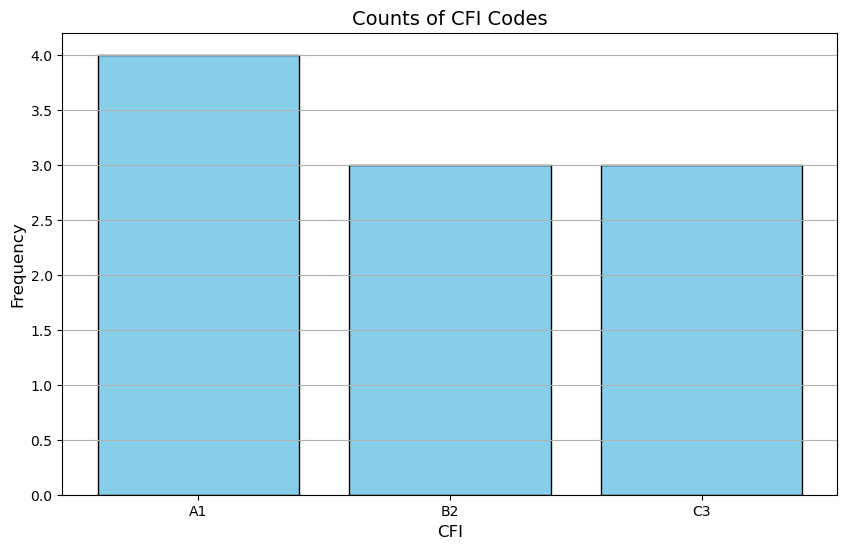

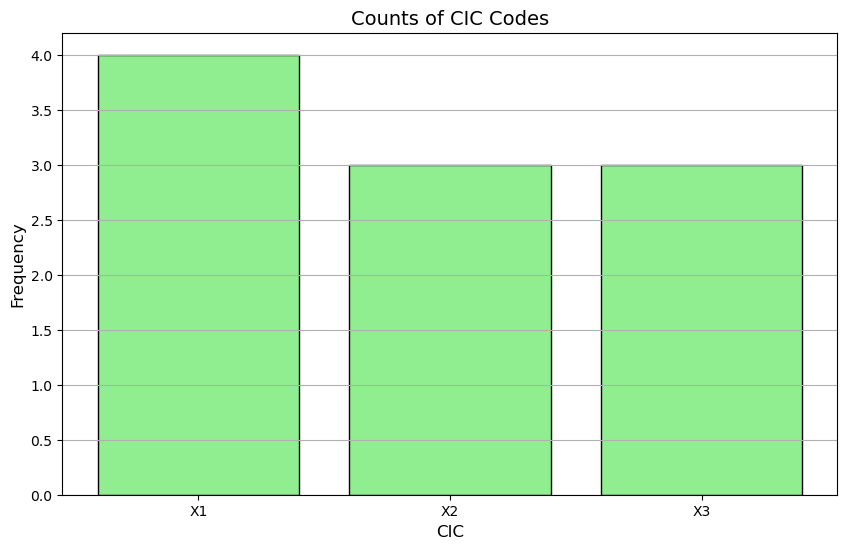

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'CFI': ['A1', 'A1', 'B2', 'A1', 'C3', 'B2', 'C3', 'A1', 'B2', 'C3'],
    'CIC': ['X1', 'X2', 'X1', 'X3', 'X2', 'X1', 'X3', 'X3', 'X1', 'X2']
}

df = pd.DataFrame(data)

cfi_counts = df['CFI'].value_counts()
cic_counts = df['CIC'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(cfi_counts.index, cfi_counts.values, color='skyblue', edgecolor='black')
plt.title('Counts of CFI Codes', fontsize=14)
plt.xlabel('CFI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(cic_counts.index, cic_counts.values, color='lightgreen', edgecolor='black')
plt.title('Counts of CIC Codes', fontsize=14)
plt.xlabel('CIC', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()


## 1. Bar Chart: Frequency of Corporate Actions by Type (LstActionCD)


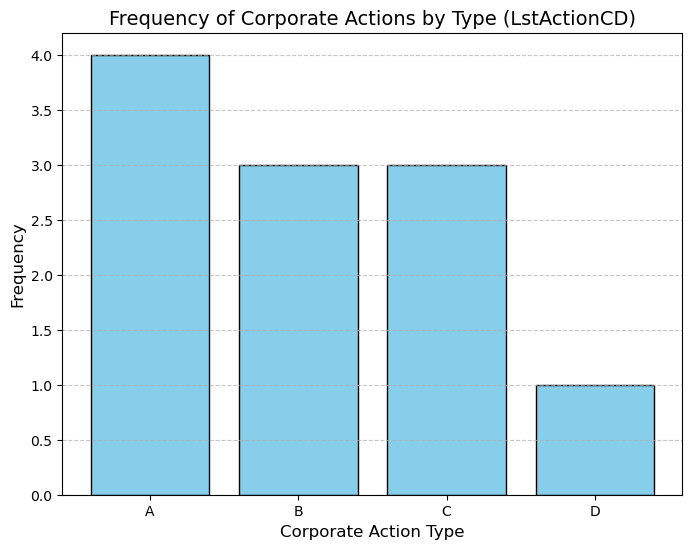

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'LstActionCD': ['A', 'B', 'A', 'C', 'A', 'B', 'C', 'A', 'C', 'B', 'D']
}

df = pd.DataFrame(data)

action_counts = df['LstActionCD'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(action_counts.index, action_counts.values, color='skyblue', edgecolor='black')
plt.title('Frequency of Corporate Actions by Type (LstActionCD)', fontsize=14)
plt.xlabel('Corporate Action Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 2. Line Graph: Trends in Outstanding Shares (SharesOutstanding) Over Time for Top Issuers


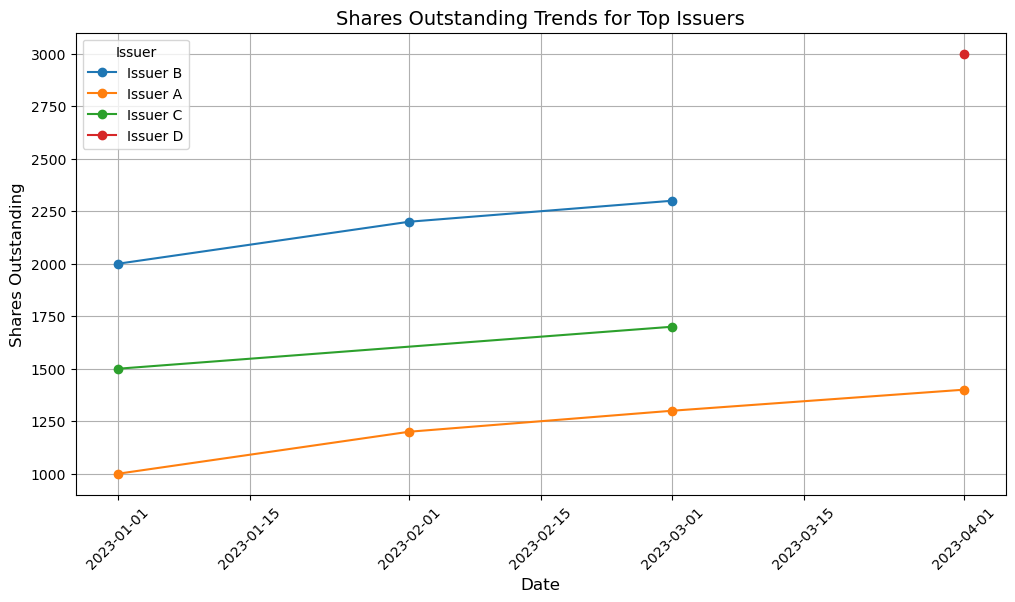

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'IssuerName': ['Issuer A', 'Issuer B', 'Issuer C', 'Issuer A', 'Issuer B',
                   'Issuer A', 'Issuer C', 'Issuer B', 'Issuer A', 'Issuer D'],
    'SharesOutstanding': [1000, 2000, 1500, 1200, 2200, 1300, 1700, 2300, 1400, 3000],
    'LstChangeDT': ['2023-01-01', '2023-01-01', '2023-01-01', '2023-02-01', 
                    '2023-02-01', '2023-03-01', '2023-03-01', '2023-03-01', 
                    '2023-04-01', '2023-04-01']
}

df = pd.DataFrame(data)

df['LstChangeDT'] = pd.to_datetime(df['LstChangeDT'])

top_issuers = df.groupby('IssuerName')['SharesOutstanding'].sum().nlargest(5).index
top_issuers_data = df[df['IssuerName'].isin(top_issuers)]

shares_trend_top = top_issuers_data.groupby(['LstChangeDT', 'IssuerName'])['SharesOutstanding'].sum().reset_index()

plt.figure(figsize=(12, 6))
for issuer in top_issuers:
    issuer_data = shares_trend_top[shares_trend_top['IssuerName'] == issuer]
    plt.plot(issuer_data['LstChangeDT'], issuer_data['SharesOutstanding'], marker='o', label=issuer)

plt.title('Shares Outstanding Trends for Top Issuers', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Shares Outstanding', fontsize=12)
plt.legend(title='Issuer', fontsize=10)
plt.xticks(rotation=45)
plt.grid()
plt.show()


## 3. Histogram: Distribution of Security IDs (SecID)


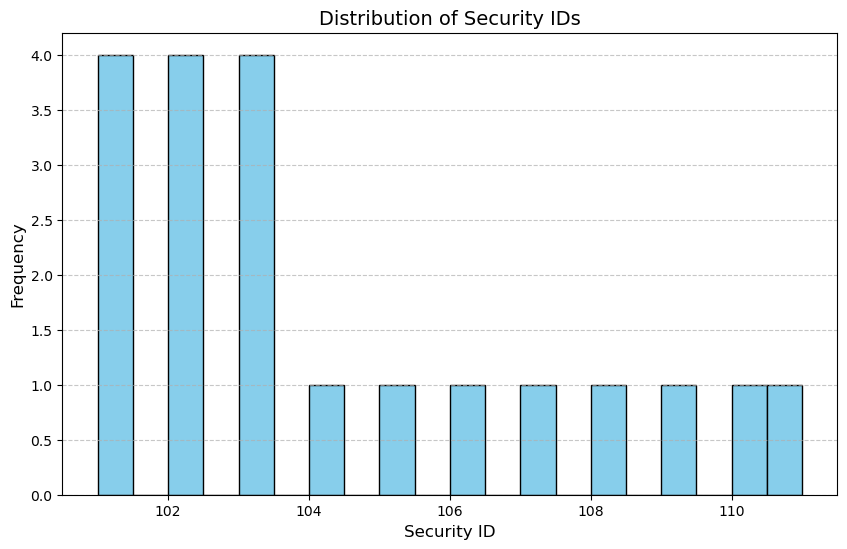

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'SecID': [101, 102, 103, 101, 102, 104, 105, 103, 101, 106, 102, 103, 107, 108, 109, 101, 110, 102, 111, 103]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.hist(df['SecID'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Security IDs', fontsize=14)
plt.xlabel('Security ID', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 4. Pie Chart: Proportion of Corporate Actions by GlobalStatusCD

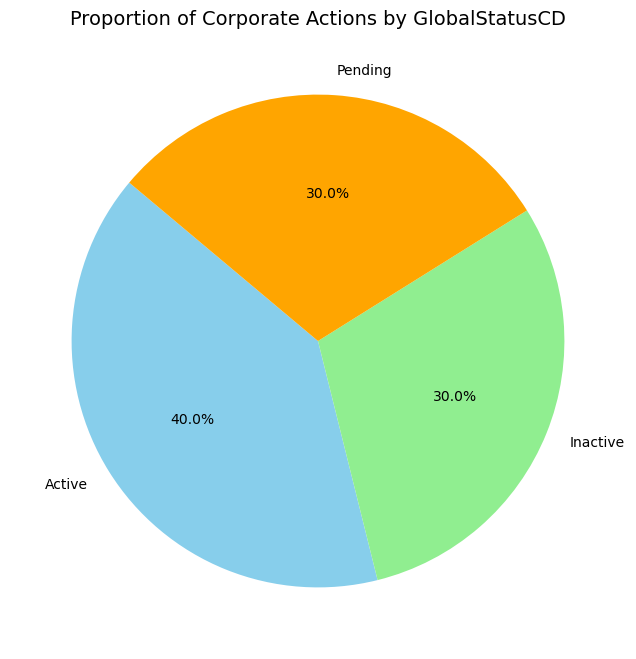

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'GlobalStatusCD': ['Active', 'Inactive', 'Pending', 'Active', 'Pending', 
                       'Inactive', 'Active', 'Active', 'Pending', 'Inactive']
}

df = pd.DataFrame(data)

status_counts = df['GlobalStatusCD'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'orange'])
plt.title('Proportion of Corporate Actions by GlobalStatusCD', fontsize=14)
plt.show()


## 5. Scatter Plot: Relationship Between Outstanding Shares (SharesOutstanding) and Voting Rights (Voting)

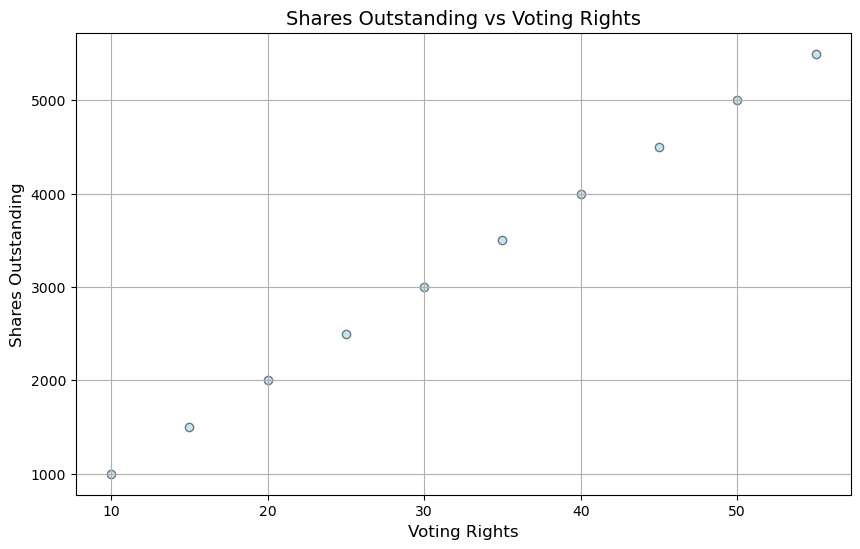

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Voting': [10, 20, 15, 25, 30, 35, 40, 45, 50, 55],
    'SharesOutstanding': [1000, 2000, 1500, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.scatter(df['Voting'], df['SharesOutstanding'], alpha=0.5, color='skyblue', edgecolors='black')
plt.title('Shares Outstanding vs Voting Rights', fontsize=14)
plt.xlabel('Voting Rights', fontsize=12)
plt.ylabel('Shares Outstanding', fontsize=12)
plt.grid()
plt.show()


## 6. Timeline Chart: Number of Corporate Actions Over Time (LstChangeDT)

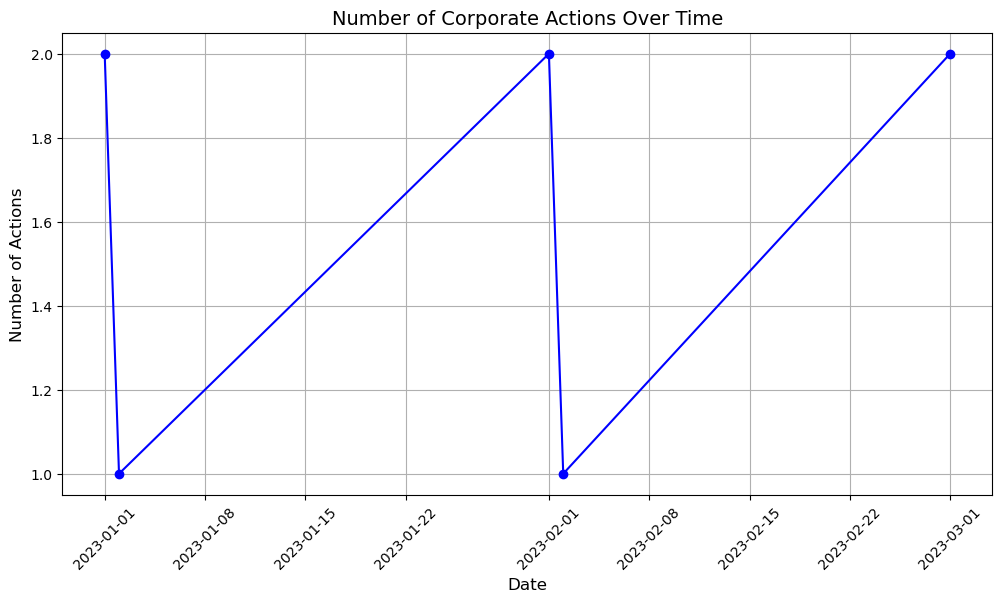

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'LstChangeDT': ['2023-01-01', '2023-01-02', '2023-01-01', '2023-02-01',
                    '2023-02-01', '2023-02-02', '2023-03-01', '2023-03-01']
}

df = pd.DataFrame(data)

df['LstChangeDT'] = pd.to_datetime(df['LstChangeDT'])

actions_over_time = df['LstChangeDT'].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 6))  # Fixed the incomplete input
plt.plot(actions_over_time.index, actions_over_time.values, marker='o', linestyle='-', color='blue')
plt.title('Number of Corporate Actions Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Actions', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()
